## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [40]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [41]:
df = pd.read_csv("../QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [42]:
df.head

<bound method NDFrame.head of                         m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]>

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [43]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [44]:
df.count

<bound method DataFrame.count of                         m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]>

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [45]:
df.groupby("TagName").count()

,m,Unnamed: 2
TagName,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [46]:
df

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [47]:
df = df.rename(columns={'m':"DATE", 'TagName':'TagName', 'Unnamed: 2': "USAGE"})

In [48]:
df.DATE

0       2008-07-01 00:00:00
1       2008-08-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
1986    2020-07-01 00:00:00
1987    2020-07-01 00:00:00
1988    2020-07-01 00:00:00
1989    2020-07-01 00:00:00
1990    2020-07-01 00:00:00
Name: DATE, Length: 1991, dtype: object

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [49]:
df.DATE = pd.to_datetime(df.DATE)

In [50]:
df.head

<bound method NDFrame.head of            DATE     TagName  USAGE
0    2008-07-01          c#      3
1    2008-08-01    assembly      8
2    2008-08-01  javascript    162
3    2008-08-01           c     85
4    2008-08-01      python    124
...         ...         ...    ...
1986 2020-07-01           r   5694
1987 2020-07-01          go    743
1988 2020-07-01        ruby    775
1989 2020-07-01        perl    182
1990 2020-07-01       swift   3607

[1991 rows x 3 columns]>

In [51]:
 reshaped_df = df.pivot(index="DATE",columns='TagName', values = 'USAGE')

## Data Manipulation



In [52]:
reshaped_df.shape

(145, 14)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [53]:
reshaped_df.head

<bound method NDFrame.head of TagName     assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TagName     javascri

In [54]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [55]:
import matplotlib.pyplot as plt


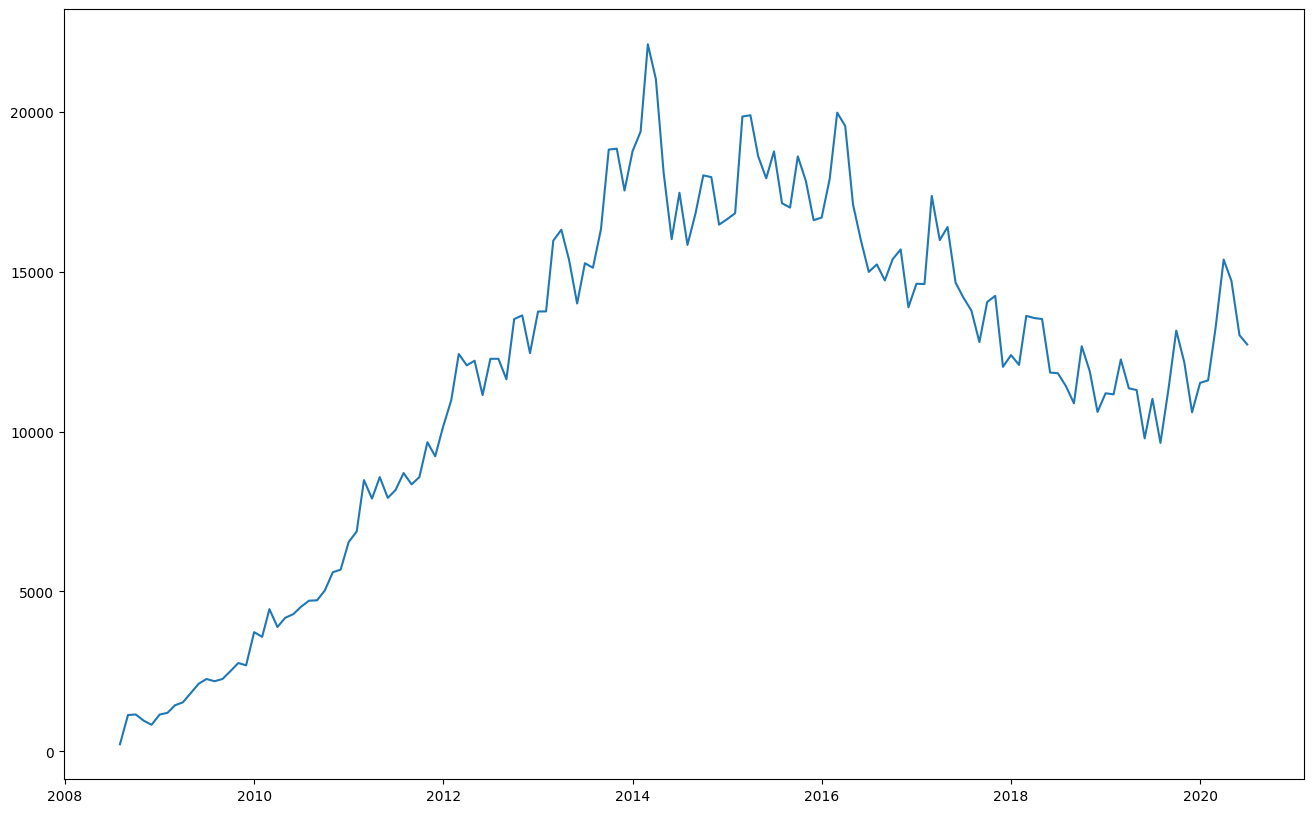

In [60]:

plt.plot(reshaped_df.index, reshaped_df.java)

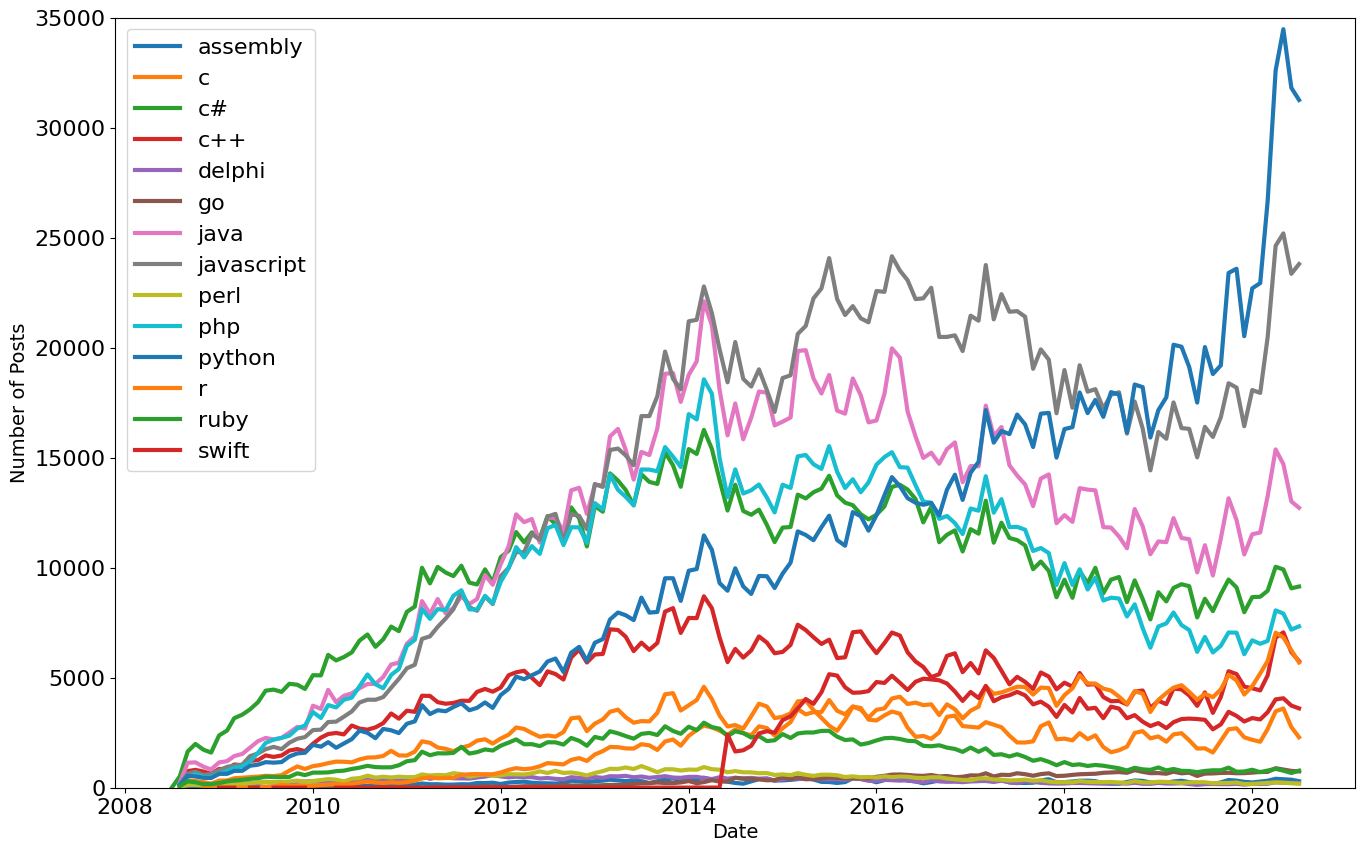

In [74]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name,linewidth=3,)
plt.legend(fontsize=16) 

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

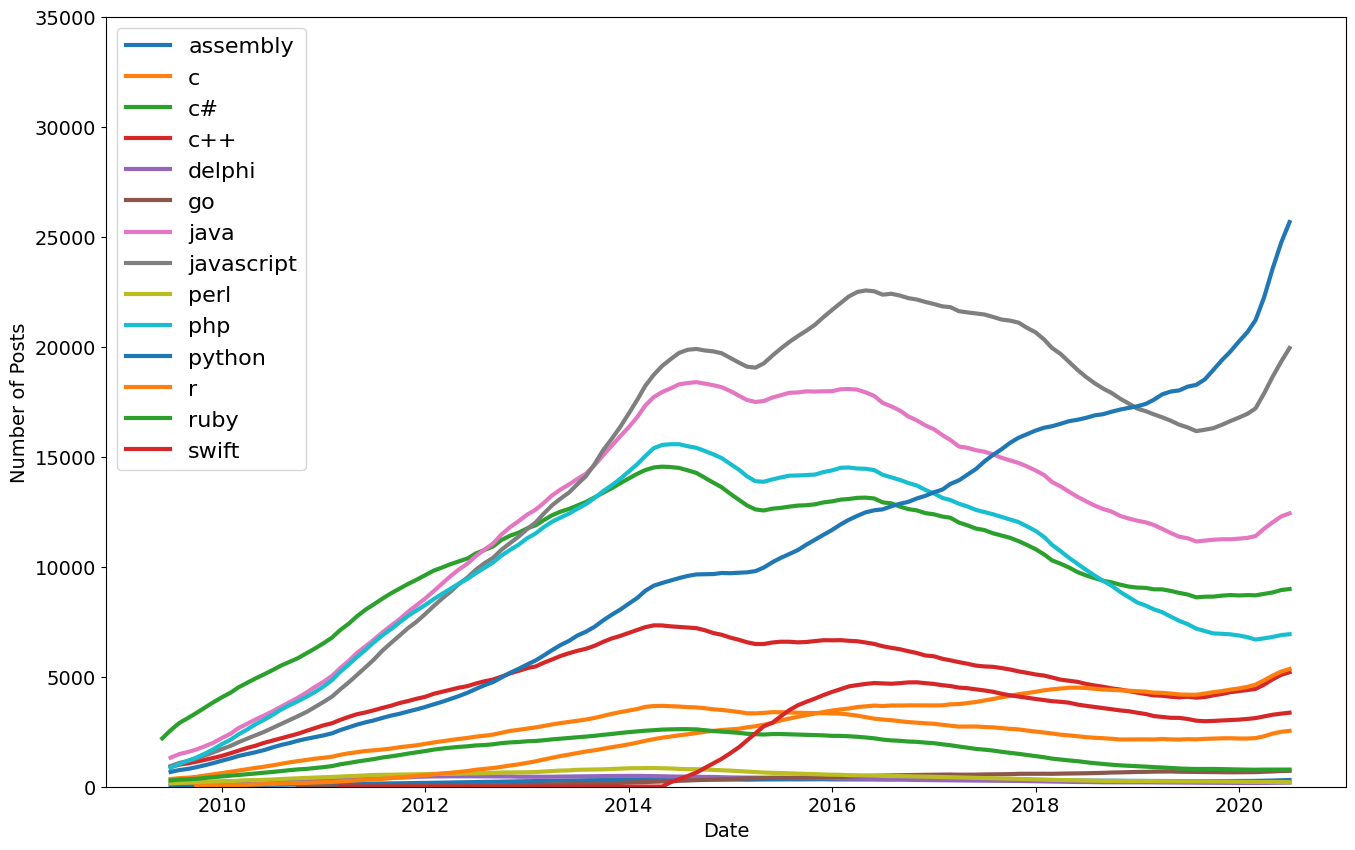

In [81]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)